# MOVIE RATING PREDICTION WITH PYTHON

<i>Build a model that predicts the rating of a movie based on features like genre, director, and actors. You can use regression techniques to tackle this problem.
The goal is to analyze historical movie data and develop a model that accurately estimates the rating given to a movie by users or critics.</i>

##  Importing the necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\TUFAN\Downloads\codsoft\Movie_Rating_Prediction\IMDb Movies India.csv",encoding='latin')

In [3]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


## Information about the dataframe

In [5]:
df.shape

(15509, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


# Data Cleaning

## Checking for null/missing values in the dataset

In [8]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
df.isnull().sum().sum()

33523

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(5659, 10)

## Checking for duplicate values in the dataset

In [12]:
df.duplicated().sum()

0

## cleaning the year column

In [13]:
df['Year']=df['Year'].str.extract(r'([0-9].{0,3})',expand=False)

##[0-9]: Matches any single digit from 0 to 9.
##.{0,3}: Matches any character (except newline) between 0 and 3 times. 
## Combined with [0-9], this pattern matches a digit followed by up to three additional characters.

## Cleaning the duration column

In [14]:
'''
[0-9]: Matches any single digit from 0 to 9.
+: Matches one or more of the preceding element (i.e., [0-9]), meaning it will match sequences of one or more digits.
'''

df['Duration'] = df['Duration'].str.extract(r'([0-9]+)', expand=False)

## Changing the duration, year, vote column from object to numeric type

In [15]:
df['Duration']=pd.to_numeric(df['Duration'])
df['Year']=pd.to_numeric(df['Year'])

In [16]:
df['Votes']=df['Votes'].str.extract(r'([0-9]+)',expand=False)
df['Votes']=pd.to_numeric(df['Votes'])

In [17]:
df['Duration'].dtype,df['Year'].dtype,df['Votes'].dtype

(dtype('int64'), dtype('int64'), dtype('int64'))

# EDA

## Years vs  number of films rated

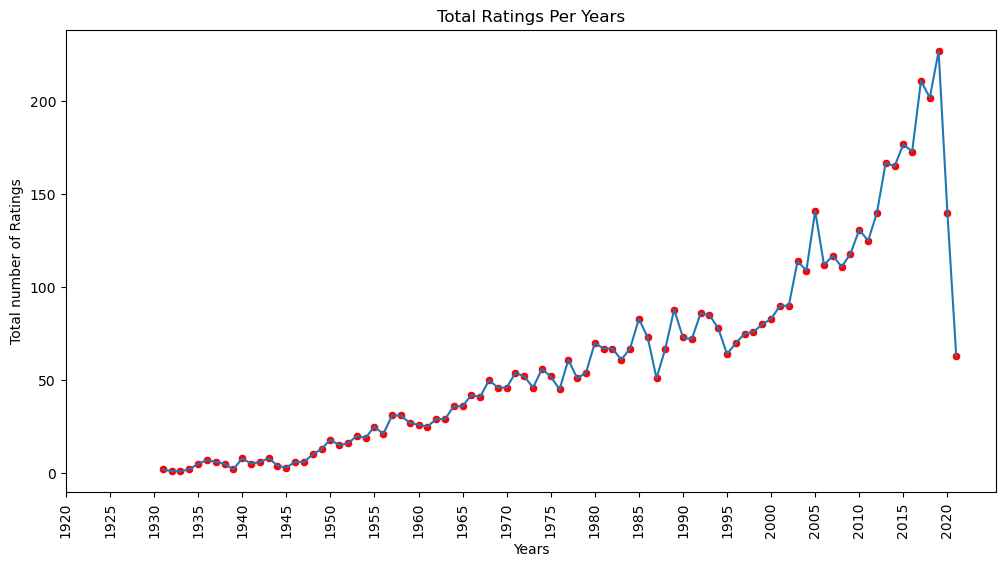

In [18]:
rating_sum = df.groupby('Year')['Rating'].count().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Year',y='Rating',data=rating_sum)
sns.scatterplot(x='Year',y='Rating',data=rating_sum,color='r')
plt.xticks(np.arange(1920,2025,5))
plt.ylabel('Total number of Ratings')
plt.xlabel('Years')
plt.title('Total Ratings Per Years')
plt.xticks(rotation=90)
plt.show()

## Year with best average rating

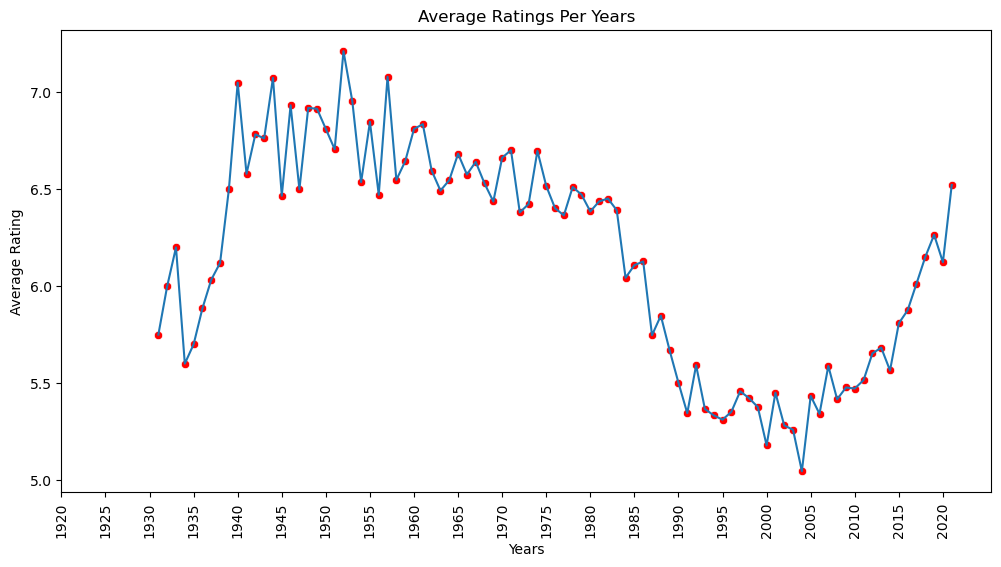

In [19]:
rating_avg = df.groupby('Year')['Rating'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(x='Year',y='Rating',data=rating_avg)
sns.scatterplot(x='Year',y='Rating',data=rating_avg,color='r')
plt.xticks(np.arange(1920,2025,5))
plt.ylabel('Average Rating')
plt.xlabel('Years')
plt.title('Average Ratings Per Years')
plt.xticks(rotation=90)
plt.show()

## Top 20 Directors by Frequency of Movies

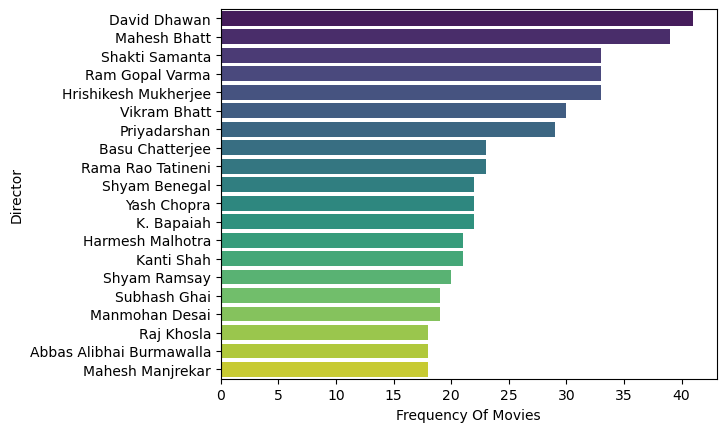

In [20]:
top_20_directors = df.groupby('Director')['Name'].count().sort_values(ascending=False).head(20)

sns.barplot(y=top_20_directors.index,x=top_20_directors.values,data=df,orient='horizontal',palette='viridis')
plt.xlabel('Frequency Of Movies')
plt.ylabel('Director')
plt.show()

## Does length of movie have any impact with the rating?

Correlation Of Duration And Rating is 0.00183934937735319


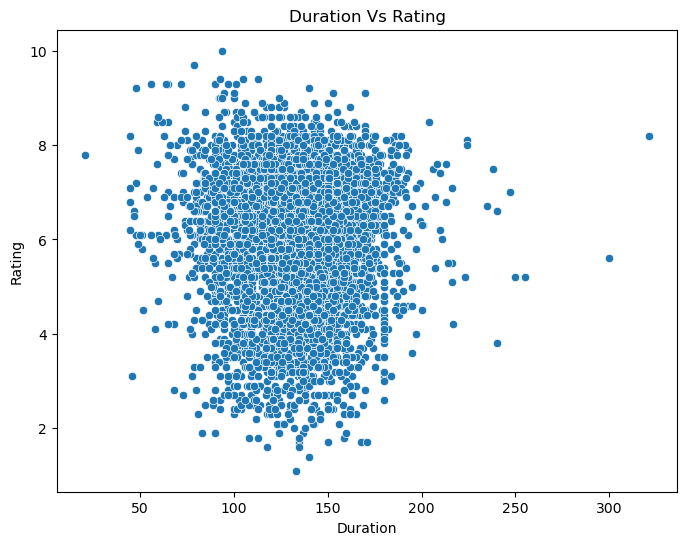

In [21]:
corr_leng_rat=df['Duration'].corr(df['Rating'])
print(f"Correlation Of Duration And Rating is {corr_leng_rat}")


plt.figure(figsize=(8,6))
sns.scatterplot(x='Duration',y='Rating',data=df)
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.title('Duration Vs Rating')
plt.show()

## `Observation & Conclusion:`
the correlation coefficient of 0.0018 suggests that there is no meaningful relationship between movie duration and rating, and it is unlikely that duration alone significantly affects how movies are rated.

## Top 10 movies according to rating 


In [22]:
overall=df.nlargest(10,'Rating')
overall=overall.reset_index(drop=True)
print("Top 10 Movies Overall:")
overall


Top 10 Movies Overall:


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
1,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
3,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
4,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
6,Baikunth,2021,72,Family,9.3,29,Vishwa Bhanu,Vishwa Bhanu,Sangam Shukla,Vijay Thakur
7,God of gods,2019,90,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
9,Refl3ct,2021,65,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar


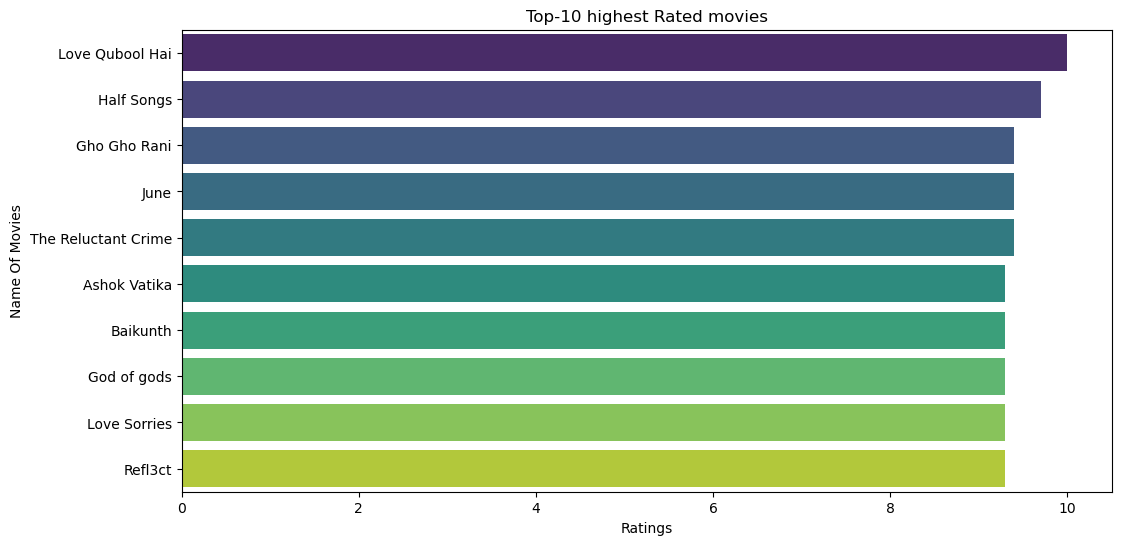

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(y='Name',x='Rating',orient='horizontal',data=overall,palette='viridis')
plt.title("Top-10 highest Rated movies")
plt.ylabel('Name Of Movies')
plt.xlabel('Ratings')
plt.show()

In [24]:
for year in df['Year'].unique():
    year_df = df[df['Year'] == year]
    top_10_year = year_df.nlargest(10, 'Rating').sort_values(by='Rating', ascending=False)
    print(f"\nTop-10 movies of the year {year}:")
    print(top_10_year)
    print('\n')


Top-10 movies of the year 2019:
                                                    Name  Year  Duration  \
5077                                        Gho Gho Rani  2019       105   
5125                                         God of gods  2019        90   
13231                                         Sindhustan  2019        64   
10210                              Nirmal Anand Ki Puppy  2019       100   
6811                               Josef - Born in Grace  2019       100   
3802                                             Dhuusar  2019       106   
1709                                    Bahattar Hoorain  2019       120   
8157   Last Chance: The Moment I Finally Embraced the...  2019        74   
14198                                  The Pickup Artist  2019       111   
8238                                         Little Baby  2019       105   

                              Genre  Rating  Votes  \
5077               History, Romance     9.4     47   
5125                  

## Most Popular Genres of movies 

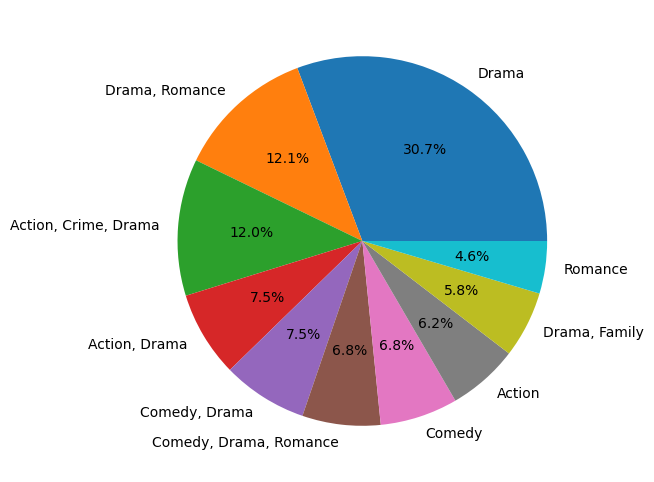

In [25]:
plt.figure(figsize=(12,6))
df['Genre'].value_counts().sort_values(ascending=False)[:10].plot(kind='pie',autopct="%1.1f%%")
plt.ylabel("")
plt.show()

## Distribution of movie rating

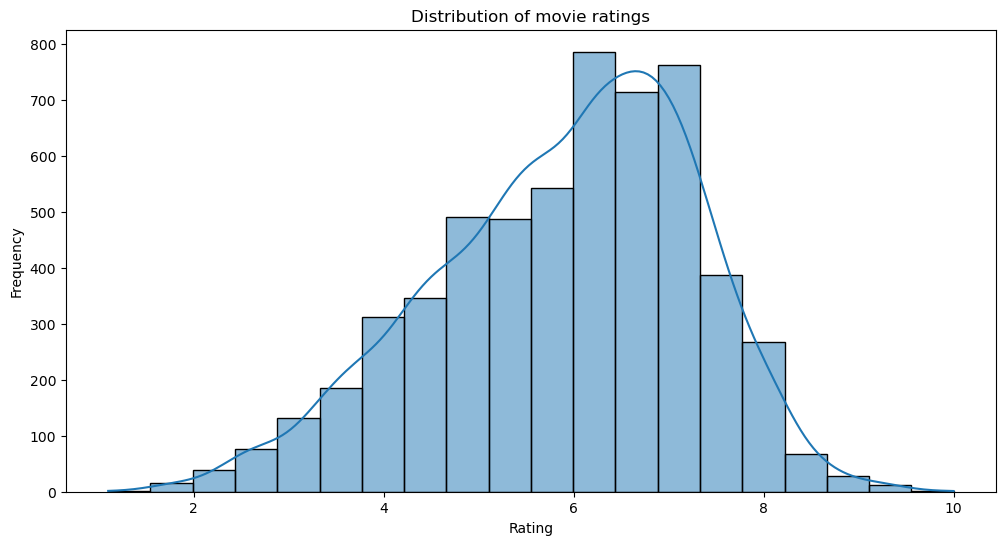

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df['Rating'],bins=20,kde=True)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of movie ratings")
plt.show()

In [27]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']]).dropna().value_counts().reset_index()
# Rename the columns to 'Name' and 'no_of_movies'
actors = actors.rename(columns={'index': 'Name', 'count': 'no_of_movies'})

## Actor with most number of movies

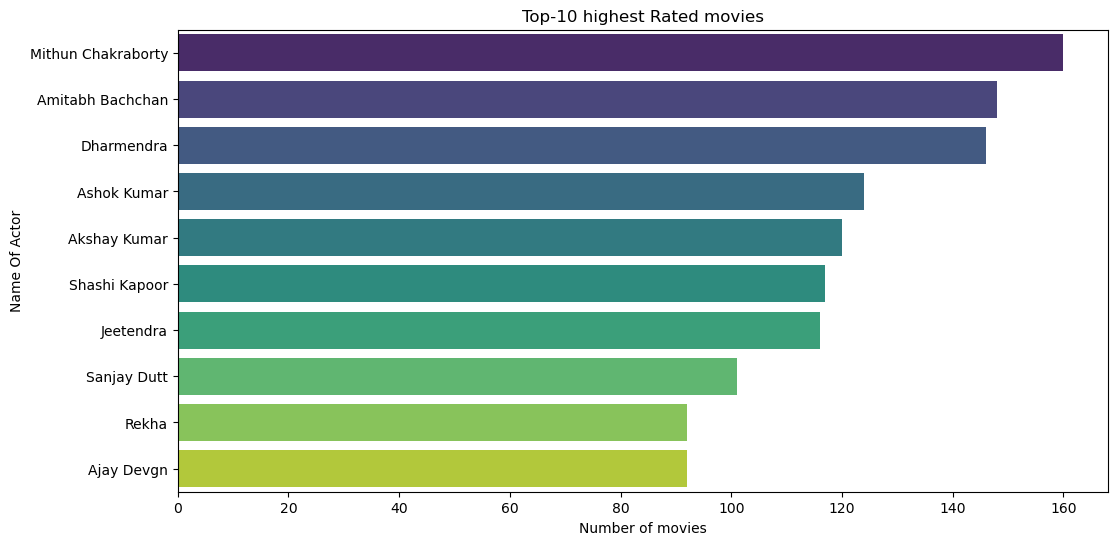

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(y=actors['Name'][:10],x=actors['no_of_movies'][:10],orient='horizontal',palette='viridis')
plt.title("Top-10 highest Rated movies")
plt.ylabel('Name Of Actor')
plt.xlabel('Number of movies')
plt.show()

## Checking for outliers through box plot

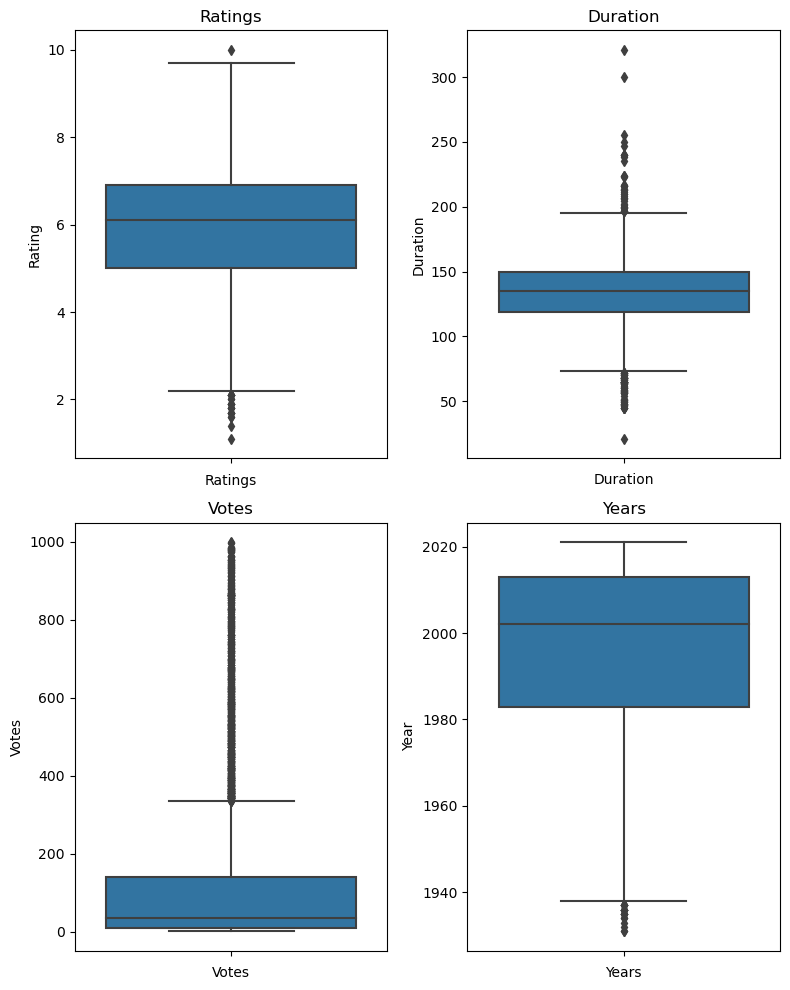

In [29]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(8,10))

sns.boxplot(data=df,y='Rating',ax=ax[0][0])
ax[0][0].set_title('Ratings')
ax[0][0].set_xlabel('Ratings')

sns.boxplot(data=df,y='Duration',ax=ax[0][1])
ax[0][1].set_title('Duration')
ax[0][1].set_xlabel('Duration')

sns.boxplot(data=df,y='Votes',ax=ax[1][0])
ax[1][0].set_title('Votes')
ax[1][0].set_xlabel('Votes')

sns.boxplot(data=df,y='Year',ax=ax[1][1])
ax[1][1].set_title('Years')
ax[1][1].set_xlabel('Years')

plt.tight_layout()

plt.show()

## Outlier treatment

In [30]:
def outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [31]:
df=outlier(df,'Rating')
df=outlier(df,'Duration')
df=outlier(df,'Votes')
df=outlier(df,'Year')

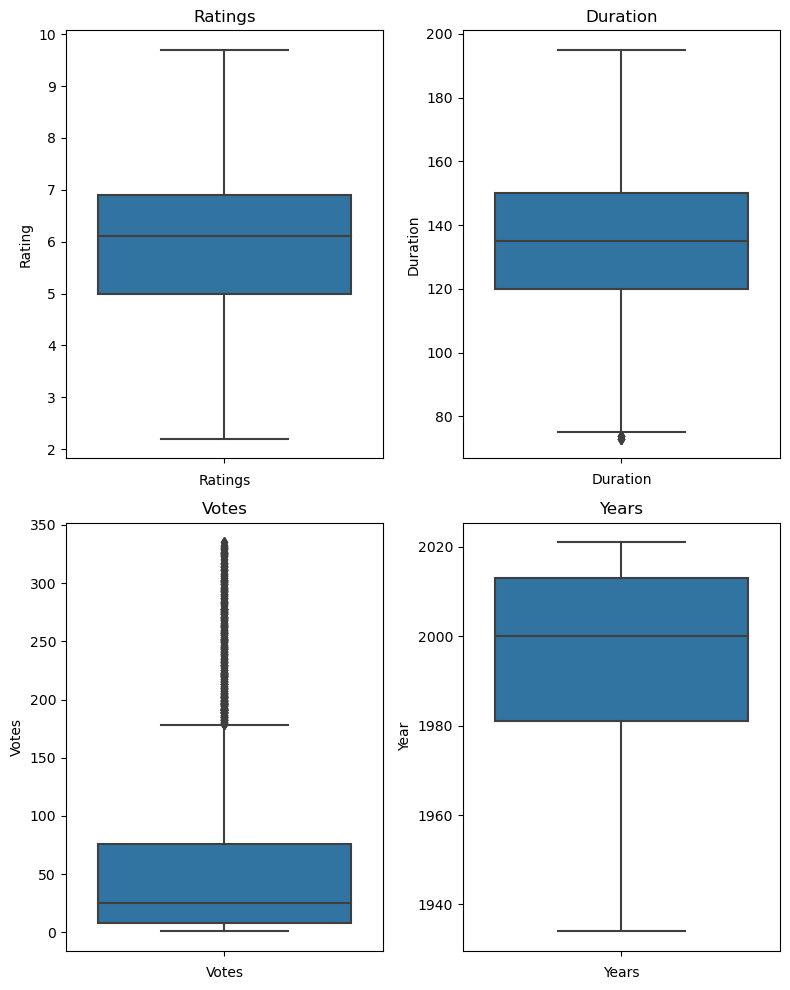

In [32]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(8,10))

sns.boxplot(data=df,y='Rating',ax=ax[0][0])
ax[0][0].set_title('Ratings')
ax[0][0].set_xlabel('Ratings')

sns.boxplot(data=df,y='Duration',ax=ax[0][1])
ax[0][1].set_title('Duration')
ax[0][1].set_xlabel('Duration')

sns.boxplot(data=df,y='Votes',ax=ax[1][0])
ax[1][0].set_title('Votes')
ax[1][0].set_xlabel('Votes')

sns.boxplot(data=df,y='Year',ax=ax[1][1])
ax[1][1].set_title('Years')
ax[1][1].set_xlabel('Years')

plt.tight_layout()

plt.show()

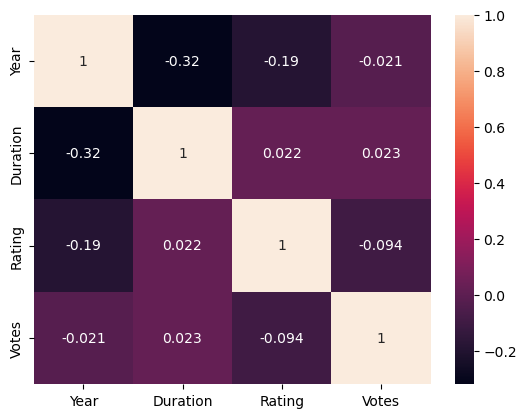

In [33]:
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)
plt.show()

## Feature Engineering

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score,mean_squared_error

## Dropping the name column as it does not impact the outcome

In [36]:
df.drop('Name',axis=1,inplace=True)

## Grouping the columns with their average rating and then creating a new feature

In [39]:
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

In [40]:
df.columns

Index(['Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3', 'genre_mean_rating', 'Director_encoded',
       'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded'],
      dtype='object')

In [41]:
## Keeping predictor and target variables

x = df[['Year', 'Duration', 'Votes', 'genre_mean_rating', 'Director_encoded',
       'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = df['Rating']

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

## Model building

### Linear regression

In [44]:
## Building model and training

model = LinearRegression()
model.fit(x_train,y_train)
model_pred = model.predict(x_test)

In [54]:
## Evaluating the performance of the model

print("The performance of evaluation of Linear regression is below:\n")
print("Mean squared error:",mean_squared_error(y_test,model_pred))
print("Mean absolute error:",mean_absolute_error(y_test,model_pred))
print("r2 score:",r2_score(y_test,model_pred))

The performance of evaluation of Linear regression is below:

Mean squared error: 0.3529112359325279
Mean absolute error: 0.4430501484661022
r2 score: 0.7964353381603186



## `Conclusion:`

In this project, I explored the task of predicting movie ratings using a linear regression model. My analysis revealed valuable insights into the performance and effectiveness of the model in capturing the variability in movie ratings.

The evaluation of the linear regression model yielded promising results. The model demonstrated a relatively low `Mean Squared Error (MSE)` of 0.3529 and `Mean Absolute Error (MAE)` of 0.4431, indicating that, on average, the model's predictions were close to the actual ratings. Additionally, the `R-squared (R2) score` of 0.7964 indicated that approximately 79.64% of the variance in the movie ratings was explained by the model.

These findings suggest that the linear regression model shows potential for accurately predicting movie ratings. However, it's important to acknowledge that there may be additional factors and complexities influencing movie ratings that were not captured in our analysis. Further research and refinement of the model, possibly incorporating additional features or employing more advanced modeling techniques, could lead to even more accurate predictions.
